## P1

In [1]:
import math
import numpy as np

"""
Problem 4 
"""

A = np.array([[10., -1,  2,  0],
              [ -1, 11, -1,  3],
              [  2, -1, 10, -1],
              [  0,  3, -1,  8]])
     
b = np.array([[  6. ],
              [ 25 ],
              [-11 ],
              [ 15 ]])
print(A.shape)

def jacobiMatrix(A,b):
    
    rows = len(A)
    cols = len(A[0])

    D     = np.zeros([rows,cols])
    L     = np.zeros([rows,cols])
    U     = np.zeros([rows,cols])
    X     = np.zeros([rows,   1])
    X_Old = np.zeros([rows,   1])

    # Set D
    for i in range(rows):
        for j in range(cols):
            if i == j:
                D[i,j] = A[i,j]

    # Set L
    for i in range(rows):
        for j in range(cols):
            if i > 0 and j < i:
                L[i,j] = -A[i,j] 
  
    # Set U
    for i in range(rows):
        for j in range(cols):
            if j > 0 and i < j:
                U[i,j] = -A[i,j]

    # Set D inverse
    DI = np.linalg.inv(D)

    # Set tolerance
    tol = 1e-10

    # Iterate for X
    for i in range(1000):
        X = np.dot(DI, np.dot((L + U), X_Old)) + np.dot(DI, b)
        # Check tolerance norms
        delta = np.linalg.norm((X - X_Old),np.inf) / np.linalg.norm(X,np.inf)
        # Set old X
        X_Old = X

        # Break when tolerance is met
        if(delta < tol):
            # Display number of iterations
            print('\nIterations: ', i+1, '\n')
            break
    
    # Print X and A.X
    print('X = \n', X, '\n')
    print('A.X = \n', np.dot(A,X), '\n')
     
jacobiMatrix(A,b)

(4, 4)

Iterations:  28 

X = 
 [[ 1.]
 [ 2.]
 [-1.]
 [ 1.]] 

A.X = 
 [[  6.]
 [ 25.]
 [-11.]
 [ 15.]] 



In [12]:
"""
Problem 5
"""

A = np.array([[1, 1, 1],
              [0, 1, 1],
              [0, 0, 1]])

# Alternate 'A'
"""
A = np.array([[1, 0, 1],
              [1, 2, 0],
              [1, 2, 0],
              [1, 2, 1]])
"""

def GramSchmidt(A):
    
    rows = len(A)
    cols = len(A[0])
    
    # Create empty Q matrix
    Q  = np.zeros([rows, cols])
    # Set first column of Q to be the same as A
    Q[:,0] = A[:,0]
    
    # Iterate over the columns
    for k in range(1,cols):
        
        #reset s to zeros
        s = np.zeros(rows)

        # Sum Gram-Schmidt iterations
        for i in range(k):
            
            s = s + (np.dot(Q[:,i], A[:,k])) / (np.dot(Q[:,i], Q[:,i])) * Q[:,i]
            
        # Set Q
        Q[:,k] = A[:,k] - s

    return Q
    
print('Q:\n',GramSchmidt(A)) 

Q:
 [[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


In [14]:
"""
Problem 6
"""

A = np.array([[1, 0, 1],
              [1, 2, 0],
              [1, 2, 0],
              [1, 2, 1]])

def GramSchmidtOrth(A):
    
    rows = len(A)
    cols = len(A[0])
    
    # Create empty Q matrix
    Q  = np.zeros([rows, cols])
    # Set first column of Q to be the same as A
    Q[:,0] = A[:,0]
    
    # Iterate over the columns
    for k in range(1,cols):
        
        #reset s to zeros
        s = np.zeros(rows)

        # Sum Gram-Schmidt iterations
        for i in range(k):
            
            s = s + (np.dot(Q[:,i], A[:,k])) / (np.dot(Q[:,i], Q[:,i])) * Q[:,i]
            
        # Set Q
        Q[:,k] = A[:,k] - s

    print('Q:\n',Q)

    # Iterate over columns
    for i in range(cols):
        
        # Normalize column
        norm = np.linalg.norm(Q[:,i],2)
        
        for j in range(rows):
            
            # Divide by norm
            Q[j,i] = Q[j,i] / norm

    return Q
    
print('\nOrthogonal:\n',GramSchmidtOrth(A)) 

Q:
 [[ 1.         -1.5         0.        ]
 [ 1.          0.5        -0.33333333]
 [ 1.          0.5        -0.33333333]
 [ 1.          0.5         0.66666667]]

Orthogonal:
 [[ 0.5        -0.8660254   0.        ]
 [ 0.5         0.28867513 -0.40824829]
 [ 0.5         0.28867513 -0.40824829]
 [ 0.5         0.28867513  0.81649658]]


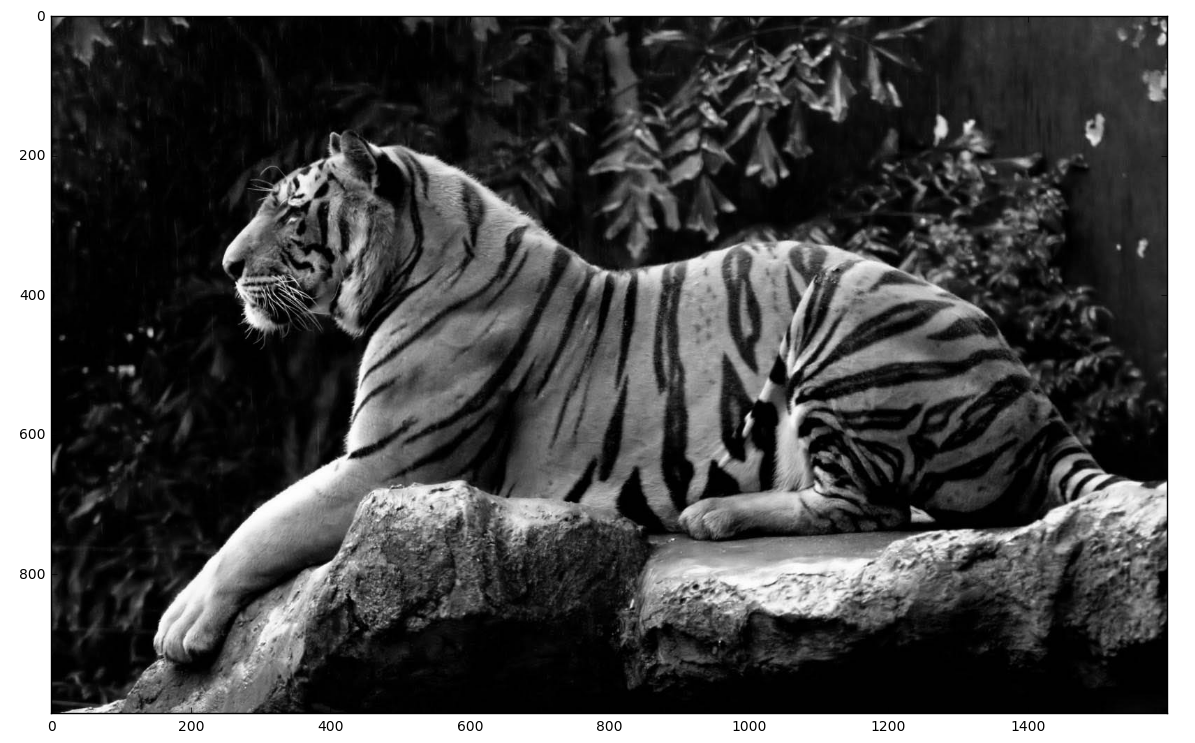

In [1]:
"""
Problem 7
"""

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Uncomment to check directory:
#ls

# Load image into Python
img = Image.open('tiger.jpg')
img_gray = img.convert('LA')
img_gray.size

# Display original image.
plt.figure(figsize = (16,9))
plt.imshow(img_gray)

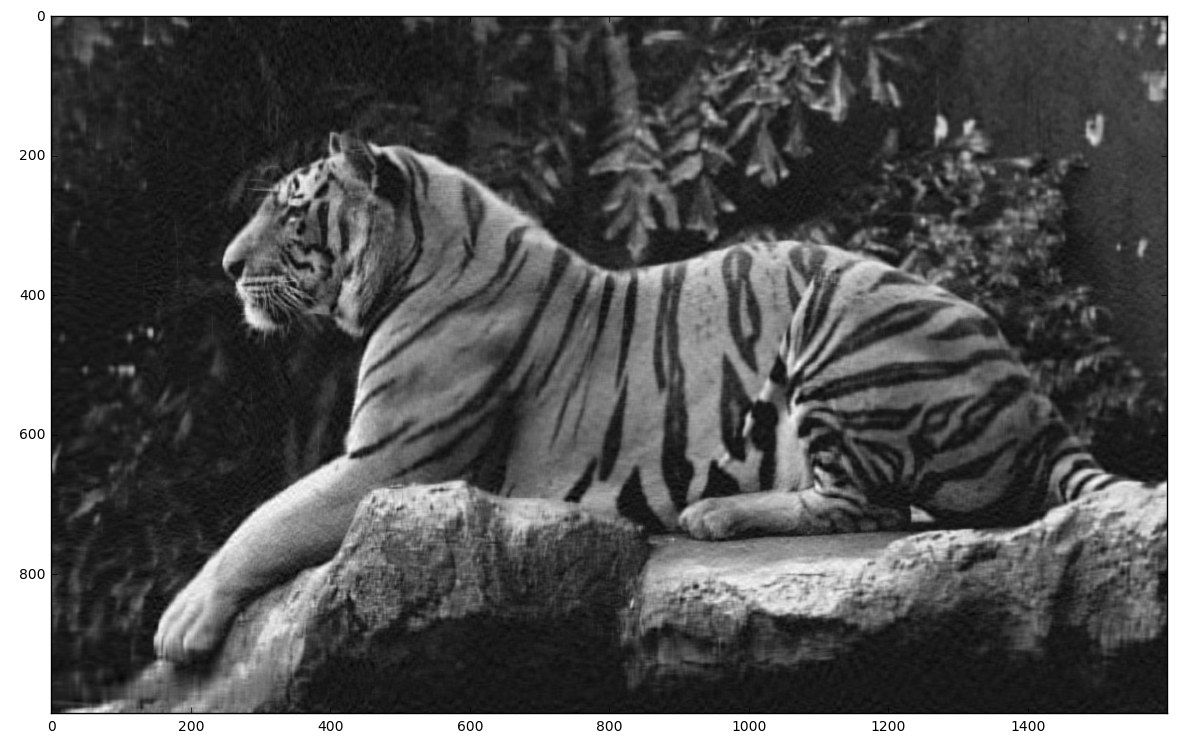

In [4]:
# Convert image to data matrix
img_matrix = np.array(list(img_gray.getdata(band=0)), float)

# Uncomment to check shape
#img_matrix.shape

# Reshape column vector into a matrix:
nrow = img_gray.size[1]
ncol = img_gray.size[0]
img_matrix = np.reshape(img_matrix, (nrow,ncol))

# Uncomment to re-check shape
#img_matrix.shape

# Create SVD
[U, s, V_t] = np.linalg.svd(img_matrix)

# Put S into a matrix
S = np.zeros([1000,1600])
for i in range(len(S)):
    S[i,i] = s[i]
    
# Take best rank approximation, alter 'k' to change output.
k = 100
U_Rank =   U[:  ,0:k]
S_Rank =   S[0:k,0:k]
V_Rank = V_t[0:k,  :]

# Dot together USV_t
A_New = np.dot(U_Rank, np.dot(S_Rank, V_Rank))

# Print new image
plt.figure(figsize = (16,9))
plt.imshow(A_New, cmap = 'gray')

k = 500 produced the best version, however by k = 200 the image was already an acceptable quality.